In [183]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [133]:
power_consumption = pd.read_csv('household_power_consumption.txt', sep=';',low_memory=False)

In [134]:
power_consumption.dropna(inplace=True)

In [142]:
power_consumption[['Sub_metering_1','Sub_metering_2']] = power_consumption[['Sub_metering_1','Sub_metering_2']].astype(str).astype(float)

In [144]:
power_consumption['parsed_datetime'] = pd.to_datetime(power_consumption['Date'] + ' ' + power_consumption['Time'], format='%d/%m/%Y %H:%M:%S')

In [146]:
power_consumption['Weekday'] = power_consumption['parsed_datetime'].apply(datetime.weekday)

In [147]:
power_consumption['Hour'] = power_consumption['parsed_datetime'].dt.hour

In [148]:
power_consumption['Week_hour'] = power_consumption['Weekday']*24 + power_consumption['Hour']

In [180]:
power_consumption['Year'] = power_consumption['parsed_datetime'].dt.year

In [156]:
pc_average_week = power_consumption.groupby('Week_hour')[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()

In [157]:
wh = np.arange(0,168)

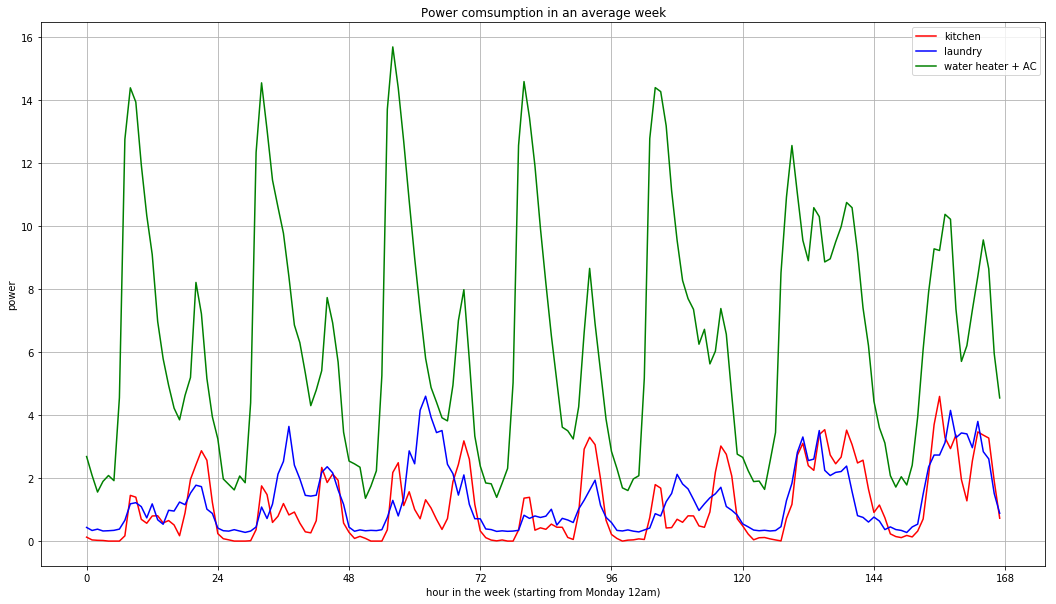

In [347]:
plt.figure(figsize=(18,10))
plt.plot(wh, pc_average_week['Sub_metering_1'], 'r', wh, pc_average_week['Sub_metering_2'], 'b', pc_average_week['Sub_metering_3'], 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Power comsumption in an average week')
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('power')
plt.legend(('kitchen','laundry','water heater + AC'))
plt.grid(True)
plt.show()

From the power used by water heater and AC, we can see that, on weekdays this family has almost the same schedule from Monday to Thursday, and on Friday they would come home earlier in the afternoon. On weekends, they tend to stay home on Saturdays and go out more on Sundays, judging from the decrease of AC use on Sunday.

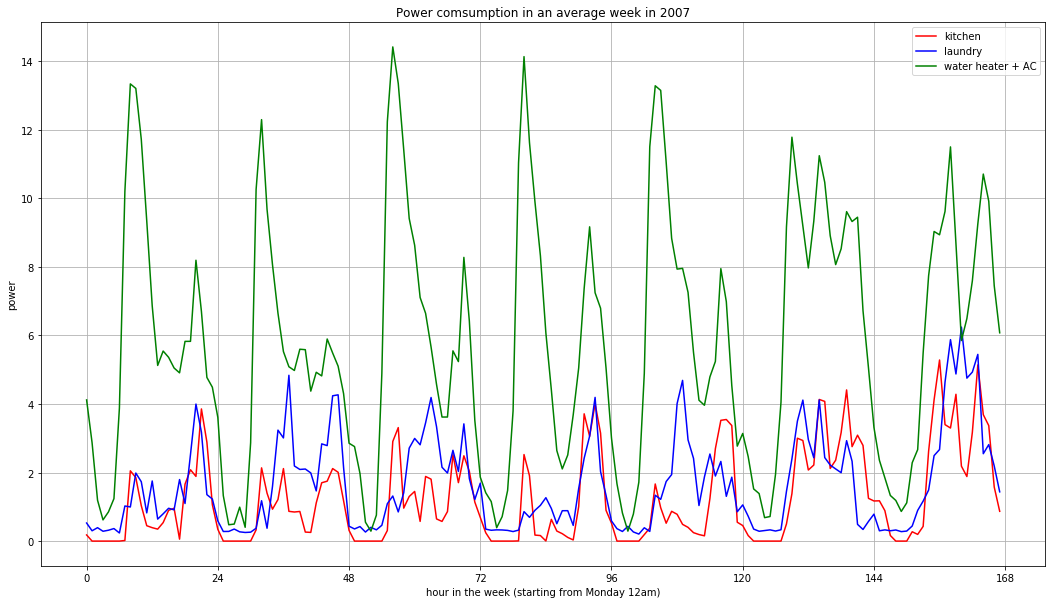

In [351]:
pc_average_week_2007 = power_consumption[power_consumption['Year']==2007].groupby('Week_hour')[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()
plt.figure(figsize=(18,10))
plt.plot(wh, pc_average_week_2007['Sub_metering_1'], 'r', wh, pc_average_week_2007['Sub_metering_2'], 'b', pc_average_week_2007['Sub_metering_3'], 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Power comsumption in an average week in 2007')
plt.legend(('kitchen','laundry','water heater + AC'))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('power')
plt.grid(True)
plt.show()

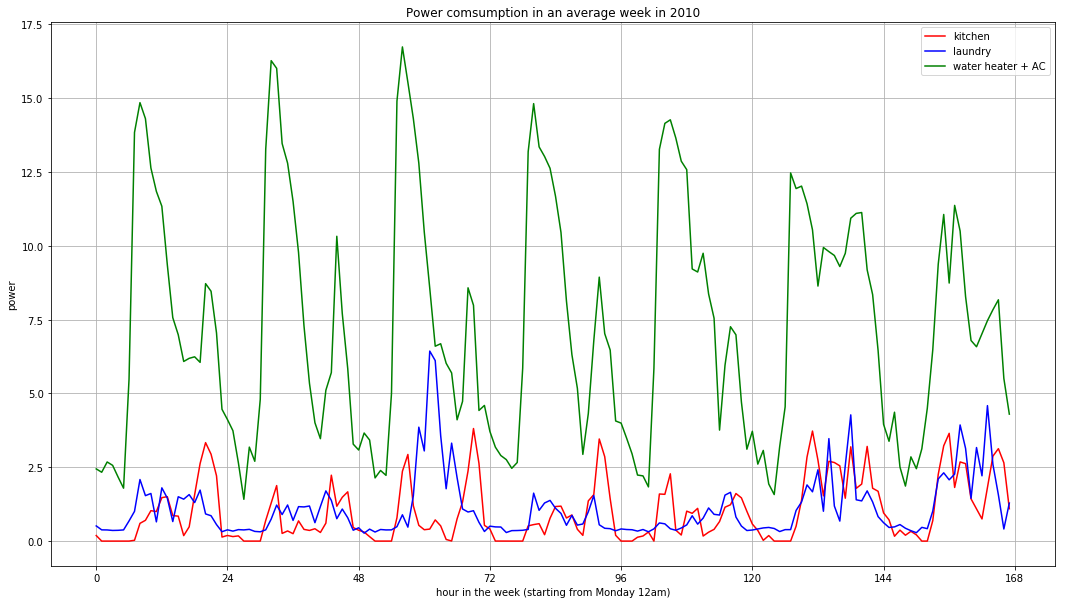

In [349]:
pc_average_week_2010 = power_consumption[power_consumption['Year']==2010].groupby('Week_hour')[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()
plt.figure(figsize=(18,10))
plt.plot(wh, pc_average_week_2010['Sub_metering_1'], 'r', wh, pc_average_week_2010['Sub_metering_2'], 'b', pc_average_week_2010['Sub_metering_3'], 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Power comsumption in an average week in 2010')
plt.legend(('kitchen','laundry','water heater + AC'))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('power')
plt.grid(True)
plt.show()

Comparing the power consumption in a week in 2007 with a week in 2010, we can clearly see the lifestyle of this family has changed. From the power use for laundry, we see that in 2010 laundry is done on mostly Wednesdays and Weekends, while in 2007 it was done on any day throughout the week. We can assume that their work hours are more regular in 2010.


There is a lot more we can do. Here we'll just take a look at their kitchen use.

In [259]:
is_using_kitchen = (power_consumption['Sub_metering_1']>0)*1

In [260]:
power_consumption['is_using_kitchen'] = is_using_kitchen

In [269]:
kitchen_usage_week = power_consumption.groupby('Week_hour')['is_using_kitchen'].mean()*60

In [287]:
kitchen_usage_week_2007 = power_consumption[power_consumption['Year']==2007].groupby('Week_hour')['is_using_kitchen'].mean()*60
kitchen_usage_week_2010 = power_consumption[power_consumption['Year']==2010].groupby('Week_hour')['is_using_kitchen'].mean()*60

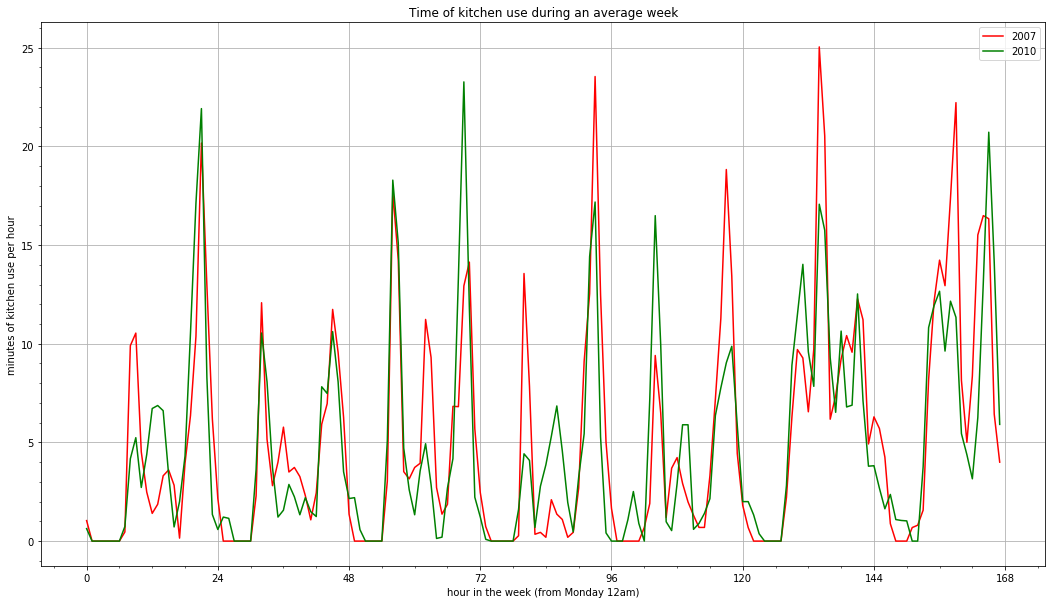

In [316]:
plt.figure(figsize=(18,10))
plt.plot(wh, kitchen_usage_week_2007, 'r', wh, kitchen_usage_week_2010, 'g')
plt.xticks(np.arange(0,169,24))
plt.title('Time of kitchen use during an average week')
plt.grid(True)
plt.minorticks_on()
plt.legend(('2007','2010'))
plt.xlabel('hour in the week (starting from Monday 12am)')
plt.ylabel('minutes of kitchen use per hour')
plt.show()

From the time of kitchen use, we can see the house owner is probably a normal working family. On weekdays, usually they would cook breakfast and dinner but not lunch. On weekends they would get up 1-2 hours later than on weekdays and eat at home.

If time permits, we can potentially do much more with this dataset. As I was exploring the data captured by the meter in the kitchen, I noticed some repeated patterns in the usage of power. 

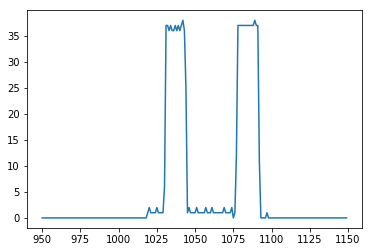

In [342]:
plt.plot(power_consumption['Sub_metering_1'][950:1150])

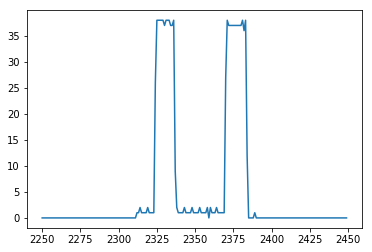

In [341]:
plt.plot(power_consumption['Sub_metering_1'][2250:2450])

For example, we can clearly see a repeated pattern in the two plots above. We should be able to pinpoint this to a specific appliance in the house (maybe a wash cycle of the dish washer). That is to say, from this power usage data of a house, we can potentially resolve every single use of each electrical appliance in this house. From there on we can know an aweful lot about this family.